## Telecom Cluster Analysis
- Try models:
      1) K-means
      2) PCA
      3) TSNE 

In [1]:
from utilties import *
from get_pred import *

In [3]:
sns.set()
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

In [3]:
import session_info
session_info.show()

## Get Data

In [4]:
df_data = pd.read_pickle('data/df_data.pkl')
df_data.shape

(2999, 28)

In [5]:
df_data.columns

Index(['night minutes', 'Duration', 'international minutes', 'night calls',
       'eve minutes', 'total day calls', 'international calls', 'vmail',
       'eve calls', 'Call day minutes', 'w_night minutes', 'w_Duration',
       'w_international minutes', 'w_night calls', 'w_eve minutes',
       'w_total day calls', 'w_international calls', 'w_vmail', 'w_eve calls',
       'w_Call day minutes', 'gender', 'SeniorCitizen',
       'Product: International', 'Product: Voice mail', 'Phone Code',
       'PaperlessBilling', 'service calls', 'churn'],
      dtype='object')

In [6]:
wieghted_feats = ['w_eve calls', 'w_eve minutes','w_night calls', 'w_total day calls', 'w_Duration', 'w_night minutes',
       'w_Call day minutes', 'w_international calls','w_international minutes', 'w_vmail']
less_imp_feats = ['gender' , 'Phone Code' , 'SeniorCitizen','Duration','w_night calls','night calls','w_Duration','eve calls',
                  'w_total day calls','total day calls','w_eve minutes']

In [10]:
filt_feats = list(set(df_data.columns)-set(wieghted_feats)-set(less_imp_feats))
filt_feats

['churn',
 'night minutes',
 'service calls',
 'Product: Voice mail',
 'international calls',
 'eve minutes',
 'vmail',
 'PaperlessBilling',
 'international minutes',
 'Product: International',
 'Call day minutes']

In [14]:
X = df_data[filt_feats].drop('churn', axis=1)
y = df_data['churn']
X

,night minutes,service calls,Product: Voice mail,international calls,eve minutes,vmail,PaperlessBilling,international minutes,Product: International,Call day minutes
customerID,,,,,,,,,,
4445-ZJNMU,0.806347,0,1,0.368421,0.621116,0.568627,1,0.430,0,0.511117
5168-MSWXT,0.227811,1,0,0.157895,0.552928,0.000000,1,0.610,0,0.334379
6366-ZGQGL,0.492200,3,1,0.684211,0.646687,0.549020,0,0.400,0,0.611174
2080-SRCDE,0.325175,1,1,0.052632,0.439648,0.725490,0,0.610,0,0.603478
8205-MQUGY,0.432491,0,0,0.157895,0.605444,0.000000,1,0.255,0,0.180160
0742-MOABM,0.406401,2,0,0.315789,0.665933,0.000000,0,0.445,0,0.425599
8332-OSJDW,0.408284,3,0,0.263158,0.427000,0.000000,0,0.710,0,0.107754
3503-TYDAY,0.217321,0,0,0.315789,0.607094,0.000000,0,0.545,0,0.313284
4622-YNKIJ,0.616729,1,0,0.157895,0.630740,0.000000,1,0.600,0,0.574116


## K-Means

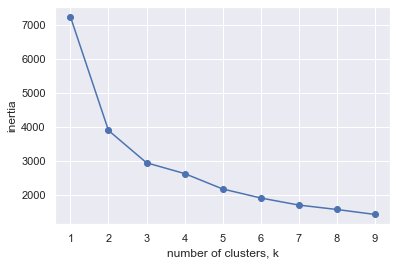

In [21]:
from sklearn.cluster import KMeans
ks = range(1, 10)    # varying cluster values from 1 to 10
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias, to apply elbow method
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [22]:
model = KMeans(n_clusters=3)
model.fit(X)
print(model.labels_)

[0 0 2 ... 0 0 2]


## K-Means Clusters correlation wrt Churn

In [42]:
df_data['label_'] = model.labels_
# Exploring if KMeans labels have correlation with Churn field
print('cluster 1 :tot ',df_data.loc[df_data['label_']==0].shape[0] ,' -> churn : ',
      df_data.loc[(df_data['label_']==0)&(df_data['churn']==1)].shape[0])
print('cluster 2 :tot ',df_data.loc[df_data['label_']==1].shape[0] ,' -> churn : ',
      df_data.loc[(df_data['label_']==1)&(df_data['churn']==1)].shape[0])
print('cluster 3 :tot ',df_data.loc[df_data['label_']==2].shape[0] ,' -> churn : ',
      df_data.loc[(df_data['label_']==2)&(df_data['churn']==1)].shape[0])

cluster 1 :tot  1679  -> churn :  196
cluster 2 :tot  231  -> churn :  120
cluster 3 :tot  1089  -> churn :  121


## PCA Cluster

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)
X_pca = np.vstack((X_pca.T, y)).T
df_pca = pd.DataFrame(X_pca, columns=['1st_Component','2n_Component', 'churn'])
df_pca.head()

,1st_Component,2n_Component,churn
0,2.244451,-0.514458,0.0
1,-0.887852,0.042487,0.0
2,2.233546,0.529967,0.0
3,2.627599,0.552478,0.0
4,-0.828352,-1.330371,0.0


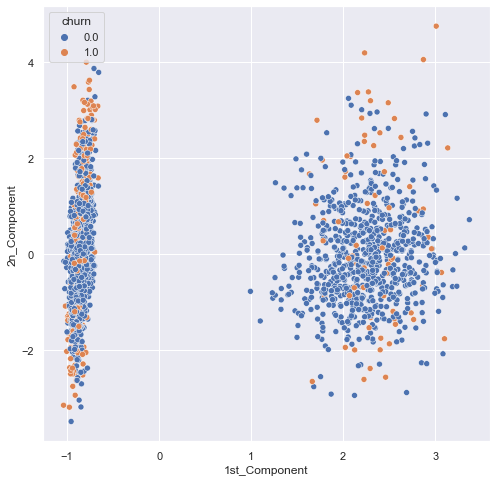

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_pca, hue='churn', x='1st_Component', y='2n_Component')
plt.show()

## TSNE Cluster

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'churn'])
df_tsne['label'] = df_data['label_'].to_list()
df_tsne.head()

,Dim1,Dim2,churn,label
0,-3.242146,-52.873337,0.0,0
1,-26.830181,32.240398,0.0,0
2,16.809923,-39.739349,0.0,2
3,31.568008,-39.774456,0.0,0
4,-31.325480,23.730333,0.0,0


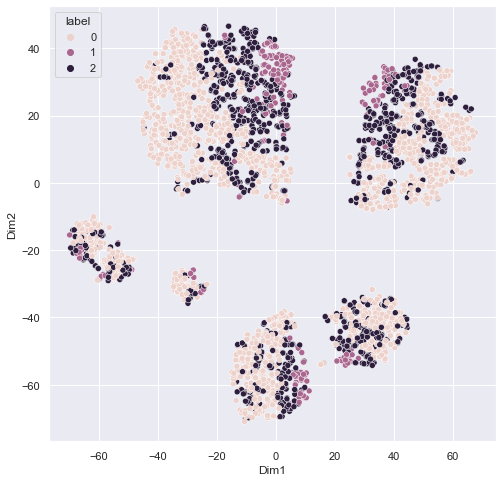

In [51]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='label', x='Dim1', y='Dim2')
plt.show()

## TSNE Plot wrt Churn

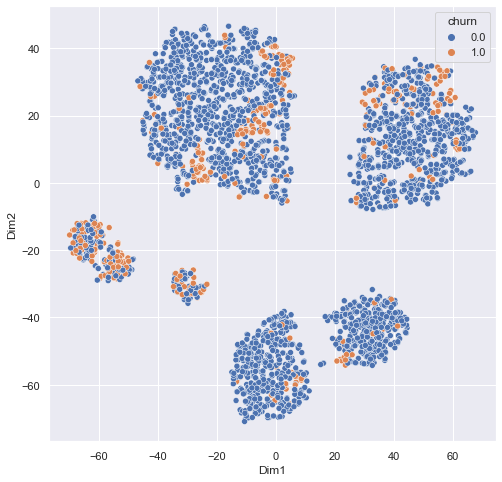

In [52]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='churn', x='Dim1', y='Dim2')
plt.show()

## Region Dim1<-20 and Dim2<-10 , quite interesting to be explored

### TODO:
    - Check Feats variance or feats importance b/w clusters (How feats effect churn)
    - Further Analyse cluster where churn rate is more than 50 percent
    - Use cluster labels as new feature for ML model to see effect